In [283]:
%pip install -U imbalanced-learn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline


Note: you may need to restart the kernel to use updated packages.


In [284]:
df=pd.read_csv('Student Performance Prediction-Binary.csv')
df

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class
0,student000000,95,91,70,90,84,64,85,85,G
1,student000001,85,76,65,61,73,64,76,76,G
2,student000002,85,41,73,61,73,61,73,73,G
3,student000003,80,78,80,79,79,57,80,79,G
4,student000004,85,91,78,80,84,67,85,85,G
...,...,...,...,...,...,...,...,...,...,...
481,student000481,90,85,93,87,81,77,92,92,G
482,student000482,80,68,93,70,83,83,90,90,G
483,student000483,80,86,93,95,90,83,96,96,G
484,student000484,75,68,80,76,88,50,78,78,G


In [285]:
df.head()

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class
0,student000000,95,91,70,90,84,64,85,85,G
1,student000001,85,76,65,61,73,64,76,76,G
2,student000002,85,41,73,61,73,61,73,73,G
3,student000003,80,78,80,79,79,57,80,79,G
4,student000004,85,91,78,80,84,67,85,85,G


In [286]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 2 categorical variables

The categorical variables are :

 ['Student ID', 'Class']


In [287]:
df[categorical].head()

,Student ID,Class
0,student000000,G
1,student000001,G
2,student000002,G
3,student000003,G
4,student000004,G


In [288]:
df[categorical].isnull().sum()


Student ID    0
Class         0
dtype: int64

In [289]:
df.Class.value_counts()


G    465
W     21
Name: Class, dtype: int64

In [290]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['Quiz01 [10]', 'Assignment01 [8]', 'Midterm Exam [20]', 'Assignment02 [12]', 'Assignment03 [25]', 'Final Exam [35]', 'Course Grade', 'Total [100]']


In [291]:
df[numerical].isnull().sum()

Quiz01 [10]          0
Assignment01 [8]     0
Midterm Exam [20]    0
Assignment02 [12]    0
Assignment03 [25]    0
Final Exam [35]      0
Course Grade         0
Total [100]          0
dtype: int64

In [292]:
X = df.drop(['Class'], axis=1)

y = df['Class']

In [293]:
X

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100]
0,student000000,95,91,70,90,84,64,85,85
1,student000001,85,76,65,61,73,64,76,76
2,student000002,85,41,73,61,73,61,73,73
3,student000003,80,78,80,79,79,57,80,79
4,student000004,85,91,78,80,84,67,85,85
...,...,...,...,...,...,...,...,...,...
481,student000481,90,85,93,87,81,77,92,92
482,student000482,80,68,93,70,83,83,90,90
483,student000483,80,86,93,95,90,83,96,96
484,student000484,75,68,80,76,88,50,78,78


In [294]:
df.drop(columns=['Student ID'],inplace=True)
df

,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class
0,95,91,70,90,84,64,85,85,G
1,85,76,65,61,73,64,76,76,G
2,85,41,73,61,73,61,73,73,G
3,80,78,80,79,79,57,80,79,G
4,85,91,78,80,84,67,85,85,G
...,...,...,...,...,...,...,...,...,...
481,90,85,93,87,81,77,92,92,G
482,80,68,93,70,83,83,90,90,G
483,80,86,93,95,90,83,96,96,G
484,75,68,80,76,88,50,78,78,G


In [295]:
x_20 =df.iloc[:, 0:2].values
y_20= df.iloc[:, -1].values

In [296]:
x_20

array([[ 95,  91],
       [ 85,  76],
       [ 85,  41],
       [ 80,  78],
       [ 85,  91],
       [ 80,  79],
       [ 70,  91],
       [ 75,  65],
       [ 80,  87],
       [ 70,  68],
       [ 90,  93],
       [ 70,  93],
       [ 80,  86],
       [ 80,  86],
       [100,  92],
       [ 80,  80],
       [ 75,  86],
       [ 70,  70],
       [ 90,  58],
       [ 80,  64],
       [ 65,  93],
       [ 80,  76],
       [ 70,  79],
       [ 80,  67],
       [ 70,  85],
       [ 70,  67],
       [ 70,  85],
       [ 85,  82],
       [ 85,  78],
       [ 95,  68],
       [ 95,  89],
       [ 70,  79],
       [ 80,  86],
       [ 80,  73],
       [ 95,  90],
       [ 85,  83],
       [ 75,  88],
       [ 80,  92],
       [ 80,  96],
       [ 75,  90],
       [ 90,  93],
       [ 75,   0],
       [ 75,  85],
       [ 90,  78],
       [ 70,  82],
       [ 85,  80],
       [ 75,  83],
       [ 85,  77],
       [ 90,  85],
       [ 80,  86],
       [ 70,  84],
       [ 75,  84],
       [ 70,

In [297]:
y_20

array(['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'W', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G',
       'G', 'W', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'W', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G

In [298]:

from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
x_sm_1,y_sm_1 = smote.fit_resample(x_20,y_20)

In [299]:
unique, counts = np.unique(y_sm_1, return_counts=True)
dict(zip(unique, counts))

{'G': 465, 'W': 465}

In [300]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, Y_train_20, Y_test_20 = train_test_split(x_sm_1, y_sm_1, test_size = 0.25, random_state = 0)

In [301]:
X_train_20.shape,X_test_20.shape

((697, 2), (233, 2))

In [302]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_20, Y_train_20)

GaussianNB()

In [303]:
y_pred = gnb.predict(X_test_20)

y_pred

array(['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'G', 'G',
       'G', 'G', 'W', 'W', 'W', 'G', 'W', 'W', 'G', 'G', 'G', 'W', 'G',
       'G', 'W', 'G', 'W', 'G', 'W', 'G', 'G', 'W', 'G', 'G', 'W', 'G',
       'G', 'G', 'G', 'W', 'W', 'G', 'G', 'G', 'W', 'G', 'W', 'W', 'G',
       'W', 'G', 'W', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'G', 'W', 'G',
       'G', 'G', 'W', 'W', 'G', 'W', 'W', 'W', 'W', 'W', 'G', 'W', 'W',
       'G', 'G', 'G', 'G', 'W', 'G', 'W', 'G', 'W', 'W', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'W', 'W', 'W', 'G', 'G', 'G', 'W', 'W',
       'G', 'W', 'W', 'W', 'G', 'G', 'W', 'W', 'W', 'G', 'W', 'G', 'W',
       'G', 'G', 'W', 'W', 'G', 'W', 'W', 'G', 'G', 'G', 'G', 'G', 'W',
       'W', 'W', 'W', 'G', 'G', 'W', 'W', 'G', 'G', 'G', 'W', 'G', 'W',
       'G', 'W', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'W', 'W', 'W', 'G',
       'G', 'W', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'W', 'G', 'G',
       'G', 'W', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'W', 'W

In [304]:
from sklearn.metrics import accuracy_score

print('Model accuracy score at 20%: {0:0.4f}'. format(accuracy_score(Y_test_20, y_pred)))

Model accuracy score at 20%: 0.8069


In [305]:
X_50=df.iloc[:, 0:4].values
Y_50=df.iloc[:, -1].values

In [306]:
X_50

array([[95, 91, 70, 90],
       [85, 76, 65, 61],
       [85, 41, 73, 61],
       ...,
       [80, 86, 93, 95],
       [75, 68, 80, 76],
       [85, 81, 88, 86]], dtype=int64)

In [307]:
Y_50

array(['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'W', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G',
       'G', 'W', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'W', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'W', 'G', 'G

In [308]:
smote=SMOTE(sampling_strategy='minority')
x_sm_2,y_sm_2 = smote.fit_resample(X_50,Y_50)

In [309]:
from sklearn.model_selection import train_test_split
X_train_50, X_test_50, Y_train_50, Y_test_50 = train_test_split(x_sm_2, y_sm_2, test_size = 0.25, random_state = 0)

In [310]:
from sklearn.preprocessing import RobustScaler,StandardScaler

scaler = RobustScaler()

X_train_50 = scaler.fit_transform(X_train_50)

X_test_50 = scaler.transform(X_test_50)

In [311]:
gnb.fit(X_train_50, Y_train_50)

GaussianNB()

In [312]:
y_pred = gnb.predict(X_test_50)

y_pred

array(['G', 'W', 'G', 'G', 'G', 'W', 'G', 'G', 'W', 'G', 'G', 'W', 'W',
       'G', 'G', 'W', 'W', 'W', 'G', 'W', 'W', 'W', 'G', 'W', 'W', 'G',
       'G', 'W', 'G', 'W', 'G', 'W', 'G', 'W', 'W', 'G', 'G', 'W', 'G',
       'G', 'G', 'W', 'W', 'W', 'G', 'G', 'W', 'W', 'G', 'W', 'W', 'W',
       'W', 'G', 'W', 'G', 'W', 'G', 'G', 'W', 'G', 'G', 'G', 'W', 'G',
       'G', 'G', 'W', 'W', 'G', 'W', 'W', 'W', 'W', 'W', 'G', 'W', 'W',
       'W', 'G', 'W', 'G', 'W', 'W', 'W', 'G', 'W', 'W', 'W', 'W', 'G',
       'G', 'G', 'G', 'G', 'G', 'W', 'W', 'G', 'G', 'W', 'G', 'W', 'W',
       'W', 'W', 'W', 'W', 'G', 'G', 'W', 'W', 'W', 'G', 'G', 'G', 'W',
       'G', 'G', 'W', 'W', 'G', 'W', 'G', 'G', 'G', 'G', 'G', 'W', 'W',
       'W', 'G', 'W', 'G', 'W', 'W', 'W', 'G', 'G', 'G', 'W', 'G', 'G',
       'G', 'W', 'G', 'G', 'G', 'G', 'W', 'G', 'G', 'W', 'W', 'W', 'G',
       'G', 'W', 'G', 'G', 'G', 'W', 'W', 'G', 'W', 'W', 'W', 'W', 'G',
       'G', 'W', 'G', 'G', 'W', 'G', 'G', 'W', 'W', 'G', 'W', 'W

In [313]:
print('Model accuracy score at 50%: {0:0.4f}'. format(accuracy_score(Y_test_50, y_pred)))

Model accuracy score at 50%: 0.9142


In [314]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test_50, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[105   9]
 [ 11 108]]

True Positives(TP) =  105

True Negatives(TN) =  108

False Positives(FP) =  9

False Negatives(FN) =  11


<AxesSubplot:>

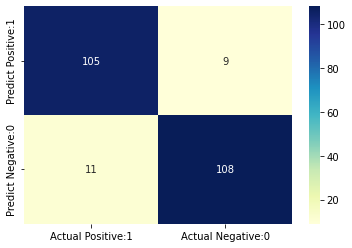

In [315]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')